Imagine two probability densities

$$\mathbb{P} = \cfrac{1}{\sqrt{2\pi}\sigma_1}e^{-\frac{(x-\mu_1)^2}{2\sigma_1^2}}$$

and

$$\mathbb{Q} = \cfrac{1}{\sqrt{2\pi}\sigma_2}e^{-\frac{(x-\mu_2)^2}{2\sigma_2^2}}$$

Compute the Radon-Nikodym derivative that moves you from $\mathbb{P}$ to $\mathbb{Q}$ and plot it.

In [2]:
import numpy as np

from scipy.stats import norm

def radon_nikodym(x, P, Q):
  return Q.pdf(x)/P.pdf(x)

mu1, mu2 = 0.05, 0.1
sigma1, sigma2 = 0.2, 0.2
P = norm(mu1, sigma1)
Q = norm(mu2, sigma2)

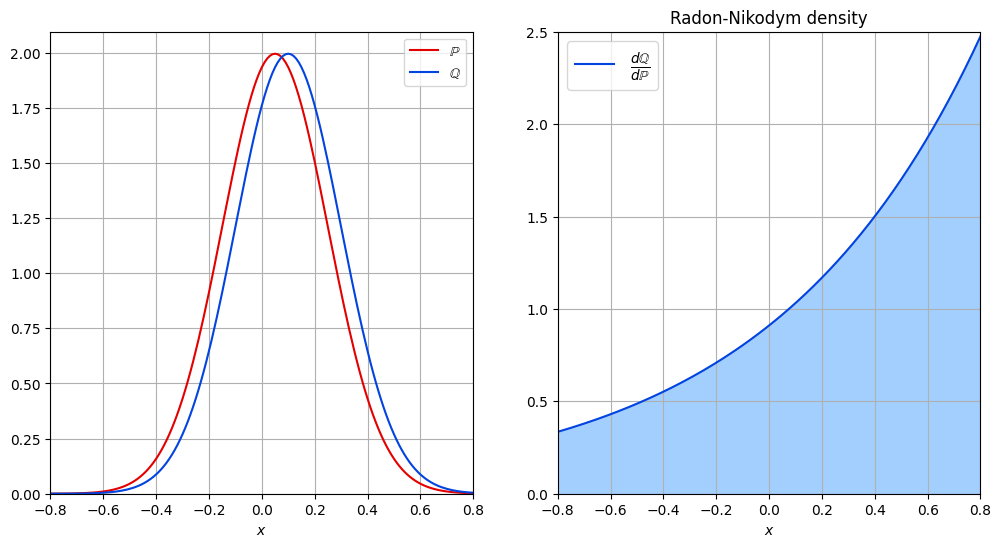

In [10]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12,6)
plt.subplot(1, 2, 1)
x = np.arange(-1, 1, 0.01)
plt.plot(x, P.pdf(x), label="$\mathbb{P}$", color='xkcd:red')
plt.plot(x, Q.pdf(x), label="$\mathbb{Q}$", color='xkcd:blue')
plt.xlabel("$x$")
plt.legend()
plt.xlim(-.8, .8)
plt.ylim(0, )
plt.grid(True)

plt.subplot(1, 2, 2)
x = np.arange(-6, 6, 0.01)
y = radon_nikodym(x, P, Q)
plt.plot(x, y, color='xkcd:blue', label=r"$\frac{d\mathbb{Q}}{d\mathbb{P}}$")
plt.fill_between(x, 0, y, color='xkcd:baby blue')
plt.grid(True)
plt.xlim(-.8, .8)
plt.ylim(0, 2.5)
plt.xlabel("$x$")
plt.legend(fontsize=14)
plt.title("Radon-Nikodym density")
plt.show()

Consider Consider the Radon-Nikodym derivative

$$\cfrac{d\mathbb{Q}}{d\mathbb{P}}=\zeta;\quad Q(A) = \int_A \zeta dP$$

What is $\mathbb{E}[\zeta]$ ?

Intuitively, we have that

$$\mathbb{E}[\zeta]=\mathbb{E}\left[\frac{dQ}{dP}\right]=\int \frac{dQ}{dP} dP$$
so the $dP$ "cancel out" so that we get
$$\mathbb{E}[\zeta]=\int dQ = 1$$


Below we have performed the integration numerically according to the following formula

\begin{equation}
\begin{gathered}
<f(x)> = \frac{1}{b-a}  \int_{a}^{b} f(x) \,dx\\
\int_{a}^{b} f(x) \,dx = (b-a) <f(x)>\\
\int_{a}^{b} f(x) \,dx \approx (b-a) \frac{1}{N} \sum_{i=1}^{N} f(x_i)
\end{gathered}
\end{equation}

In [3]:
import numpy as np
from scipy.stats import norm

def radon_nikodym(x, P, Q):
  den = P.pdf(x)
  den = np.where(den == 0, 1e-30, den)
  return Q.pdf(x)/den

def integration_mc(f, args, llim, ulim, iter=10000):
  x = np.random.rand(iter)
  x = x * (ulim-llim) + llim
  dP = args[0].pdf(x)
  vals = f(x, *args)*dP
  return (ulim-llim)*np.mean(vals)

print (integration_mc(radon_nikodym, (P, Q,), -5, 5, 10000000))

0.9990560242171255
